In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/npp-nep-rh-boreal-ecosystems-fire-2020/NPP_NEP_RH_Boreal_Ecosystems_WithoutFire.csv
/kaggle/input/npp-nep-rh-boreal-ecosystems-fire-2020/Soil_Temps_Boreal_Ecosystems.csv
/kaggle/input/npp-nep-rh-boreal-ecosystems-fire-2020/NPP_NEP_RH_Boreal_Ecosystems_FireConsidered.csv


In [4]:
import pandas as pd

# Load the datasets from the given paths
df_with_fire = pd.read_csv('/kaggle/input/npp-nep-rh-boreal-ecosystems-fire-2020/NPP_NEP_RH_Boreal_Ecosystems_FireConsidered.csv')
df_without_fire = pd.read_csv('/kaggle/input/npp-nep-rh-boreal-ecosystems-fire-2020/NPP_NEP_RH_Boreal_Ecosystems_WithoutFire.csv')
df_soil_temps = pd.read_csv('/kaggle/input/npp-nep-rh-boreal-ecosystems-fire-2020/Soil_Temps_Boreal_Ecosystems.csv')

# Merge the datasets on the 'year' column
combined_df = pd.merge(df_with_fire, df_without_fire, on='year', suffixes=('_with_fire', '_without_fire'))
combined_df = pd.merge(combined_df, df_soil_temps, on='year')

# Display the first few rows of the combined dataset
print("Combined Dataset Preview:")
print(combined_df.head())

# Check for any missing values in the combined dataset
print("\nMissing Values in Combined Dataset:")
print(combined_df.isnull().sum())


Combined Dataset Preview:
   year   NPP_with_fire   NPP_canopy_effect_with_fire   RH_with_fire  \
0  1986         712.540                       685.804        784.750   
1  1987         804.623                       781.206        802.676   
2  1988         895.059                       865.716        766.188   
3  1989         788.538                       763.494        744.804   
4  1990         765.699                       734.726        739.649   

    RH_canopy_effect_with_fire   NEP_with_fire  NEP_canopy_effect_with_fire  \
0                      757.913       -72.21080                    -72.10690   
1                      774.222         1.97903                      7.00663   
2                      739.978       128.88800                    125.74600   
3                      719.531        43.72560                     43.95540   
4                      713.201        26.04910                     21.52740   

    NPP_without_fire   NPP_canopy_effect_without_fire   RH_without

In [6]:
# Check the column names in the combined dataset
print("Combined DataFrame columns:")
print(combined_df.columns)

Combined DataFrame columns:
Index(['year', ' NPP_with_fire', ' NPP_canopy_effect_with_fire',
       ' RH_with_fire', ' RH_canopy_effect_with_fire', ' NEP_with_fire',
       'NEP_canopy_effect_with_fire', ' NPP_without_fire',
       ' NPP_canopy_effect_without_fire', ' RH_without_fire',
       ' RH_canopy_effect_without_fire', ' NEP_without_fire',
       'NEP_canopy_effect_without_fire', ' 5cm_fire', '20cm_fire',
       '5cm_canopy', '20cm_canopy'],
      dtype='object')


In [7]:
# Clean the column names by stripping leading/trailing spaces
combined_df.columns = combined_df.columns.str.strip()

# Verify that the column names are now clean
print(combined_df.columns)


Index(['year', 'NPP_with_fire', 'NPP_canopy_effect_with_fire', 'RH_with_fire',
       'RH_canopy_effect_with_fire', 'NEP_with_fire',
       'NEP_canopy_effect_with_fire', 'NPP_without_fire',
       'NPP_canopy_effect_without_fire', 'RH_without_fire',
       'RH_canopy_effect_without_fire', 'NEP_without_fire',
       'NEP_canopy_effect_without_fire', '5cm_fire', '20cm_fire', '5cm_canopy',
       '20cm_canopy'],
      dtype='object')


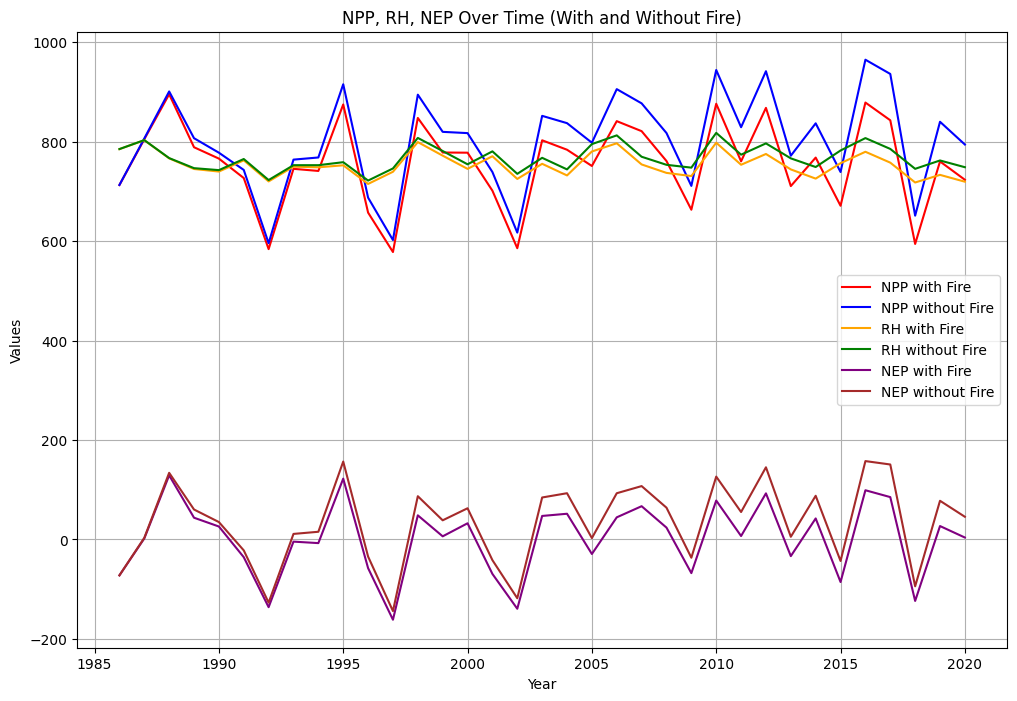

In [8]:
import matplotlib.pyplot as plt

# Plot the evolution of NPP, RH, and NEP over time
plt.figure(figsize=(12, 8))

plt.plot(combined_df['year'], combined_df['NPP_with_fire'], label='NPP with Fire', color='red')
plt.plot(combined_df['year'], combined_df['NPP_without_fire'], label='NPP without Fire', color='blue')
plt.plot(combined_df['year'], combined_df['RH_with_fire'], label='RH with Fire', color='orange')
plt.plot(combined_df['year'], combined_df['RH_without_fire'], label='RH without Fire', color='green')
plt.plot(combined_df['year'], combined_df['NEP_with_fire'], label='NEP with Fire', color='purple')
plt.plot(combined_df['year'], combined_df['NEP_without_fire'], label='NEP without Fire', color='brown')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('NPP, RH, NEP Over Time (With and Without Fire)')
plt.legend()
plt.grid(True)
plt.show()


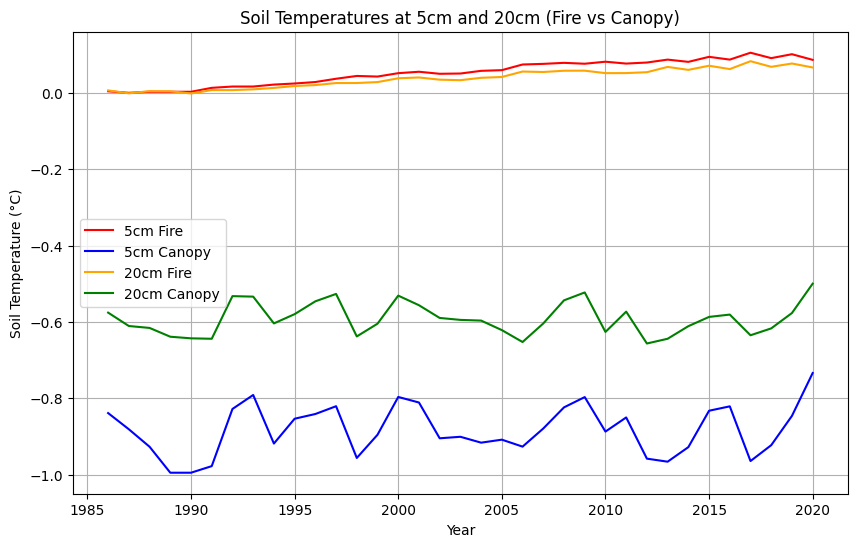

In [9]:
# Plotting soil temperatures at 5cm and 20cm for both fire and canopy effect
plt.figure(figsize=(10, 6))

plt.plot(combined_df['year'], combined_df['5cm_fire'], label='5cm Fire', color='red')
plt.plot(combined_df['year'], combined_df['5cm_canopy'], label='5cm Canopy', color='blue')
plt.plot(combined_df['year'], combined_df['20cm_fire'], label='20cm Fire', color='orange')
plt.plot(combined_df['year'], combined_df['20cm_canopy'], label='20cm Canopy', color='green')

plt.xlabel('Year')
plt.ylabel('Soil Temperature (°C)')
plt.title('Soil Temperatures at 5cm and 20cm (Fire vs Canopy)')
plt.legend()
plt.grid(True)
plt.show()


### Conclusion

The data from 1986 to 2020 provides insightful observations regarding the effects of **wildfires** and **canopy cover** on boreal ecosystems. Here are the key findings:

1. **Net Primary Productivity (NPP)**: 
   - Wildfires have a noticeable negative effect on NPP, which measures the amount of carbon absorbed by plants. The productivity of ecosystems is generally lower in areas impacted by wildfires compared to those without fires.
   - Example: In 2016, NPP was 878.387 gC/m² in areas affected by fires, while it was 964.489 gC/m² in areas without fires.

2. **Heterotrophic Respiration (RH)**:
   - RH, which accounts for carbon released through the decomposition of organic matter, is similarly affected by wildfires. Areas with fires show lower respiration rates, likely due to reduced organic material available for decomposition.
   - Example: In 2016, RH was 779.436 gC/m² with fires, compared to 806.936 gC/m² without fires.

3. **Net Ecosystem Productivity (NEP)**:
   - NEP, which represents the net carbon storage in ecosystems, is significantly higher in areas without wildfires. This indicates that wildfires reduce the capacity of ecosystems to sequester carbon.
   - Example: In 2016, NEP was 98.952 gC/m² with fires, while it was 157.563 gC/m² without fires, showing a clear reduction in carbon storage due to fire events.

4. **Soil Temperatures**:
   - Wildfires lead to an increase in soil temperatures at both 5 cm and 20 cm depths. This is likely due to the loss of vegetation cover, which exposes the soil to direct sunlight. In contrast, areas under the canopy remain cooler.
   - Example: In 2020, the soil temperature at 5 cm depth was 0.086861°C in areas with fire, compared to -0.733932°C under the canopy.

### Summary:
- **Wildfires** negatively impact both the productivity and carbon storage capacity of boreal ecosystems, while also increasing soil temperatures. This can have long-term ecological consequences, particularly in regions prone to more frequent fires due to climate change.
- The **canopy** plays a critical role in protecting the soil, maintaining lower temperatures, and enhancing ecosystem productivity and carbon sequestration. 

These insights highlight the importance of **fire management** and **canopy preservation** in maintaining the health and resilience of boreal forests in the face of environmental changes.
